# Sheet 3

## Sam Hewson (Group 4), Qiyu Li (Group 4)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## 1 Regularization and Intercept

### (a)

$$ \text{Loss}_\text{Ridge} = \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{1i} - \beta_2 x_{2i})^2 + \lambda (\beta_0^2 + \beta_1^2 +\beta_2^2),$$

where $x_i  = (1, x_{1i}, x_{2i})$, $\lambda$ is regularization strength. Higher $\lambda$ makes $\beta_0$ smaller in regression.

$\lambda > 0$, $\beta_0 = 0$ to minimise loss

### (b)

$$ \text{Loss}_\text{Ridge Modified} = \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{1i} - \beta_2 x_{2i})^2 + \lambda (\beta_1^2 +\beta_2^2),$$


### (c)
For (a), regularization penalty is $\lambda (\beta_0^2 + \beta_1^2 +\beta_2^2)$. The regularization contours are **spheres**.

For (b), regularization penalty is $\lambda (\beta_1^2 +\beta_2^2)$. The regularization contours are **cylinder surfaces**, the symmetric axis is along $\beta_0$ axis. 

## 2 $\sigma^2$ Estimation

### (a)

$$\mathcal{N} (y_n | \beta^T x_n, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp[-\frac{(y_n - \beta^T x_n)^2}{2\sigma^2}],$$

$$\log \mathcal{N} (y_n | \beta^T x_n, \sigma^2) = -\frac{1}{2}\log(2 \pi \sigma^2) -\frac{(y_n - \beta^T x_n)^2}{2\sigma^2},$$

$$\hat{\beta} = \text{arg max}_\beta \sum_{n=1}^N \log \mathcal{N} (y_n | \beta^T x_n, \sigma^2),$$

$$ = \text{arg max}_\beta [-\frac{N}{2}\log(2 \pi \sigma^2) -\frac{1}{2\sigma^2}\sum_{n=1}^N {(y_n - \beta^T x_n)^2}],$$

$$= \text{arg min}_\beta \frac{1}{2\sigma^2}\sum_{n=1}^N {(y_n - \beta^T x_n)^2},$$

which is SSQ formulation with a factor of $\frac{1}{2\sigma^2}$.

### (b)
$$\hat{\sigma}^2 = \text{arg max}_{\sigma^2} \sum_{n=1}^N \log \mathcal{N} (y_n | {\beta}^T {x}_n, \sigma^2),$$

$$= \text{arg max}_{\sigma^2} [-\frac{N}{2}\log(2 \pi \sigma^2) -\frac{1}{2\sigma^2}\sum_{n=1}^N {(y_n - {\beta}^T {x}_n)^2}],$$

$$= \text{arg min}_{\sigma^2} \frac{N}{2}\log(2 \pi) + \frac{N}{2}\log(\sigma^2) + \frac{1}{2\sigma^2}\sum_{n=1}^N {(y_n - {\beta}^T {x}_n)^2},$$

$$= \text{arg min}_{\sigma^2} \frac{A}{\sigma^2} + B \log(\sigma^2)$$

where $A = \frac{1}{2}\sum_{n=1}^N {(y_n - {\beta}^T {x}_n)^2}$, $B = N/2$. This can be solved simply by let the derivative respect to $\sigma^2$ equals 0, which gives

$$\hat{\sigma}^2 = \frac{A}{B} = \frac{1}{N} \sum_{n=1}^N {(y_n - {\hat\beta}^T {x}_n)^2},$$

which is simply the average sum of squared residuals for the minimal sum of squares value ($\hat\beta$ ). 

## 3 Visualize Regularization Contours

x.shape: (2, 100), "y.shape:" (1, 100)


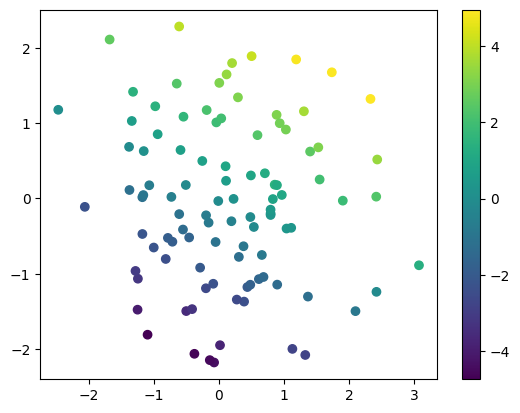

In [3]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'x.shape: {x.shape}, "y.shape:" {y.shape}')
plt.scatter(*x, c=y);
plt.colorbar()
plt.show()

In [4]:
# create a grid of points in the parameter space
b1, b2 = np.linspace(-1, 3, 100), np.linspace(-1, 3, 100)
bs = np.stack(np.meshgrid(b1, b2, indexing='ij'), axis=-1)
bs.shape

(100, 100, 2)

### (a)

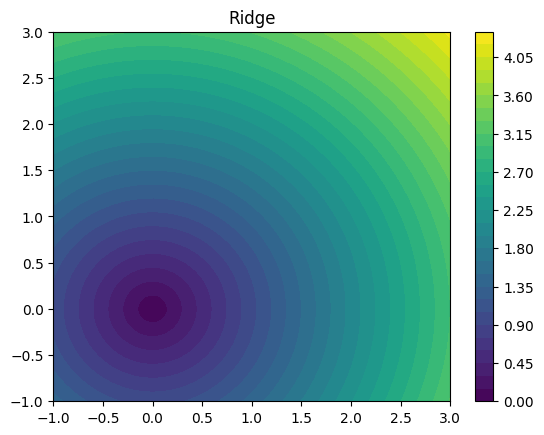

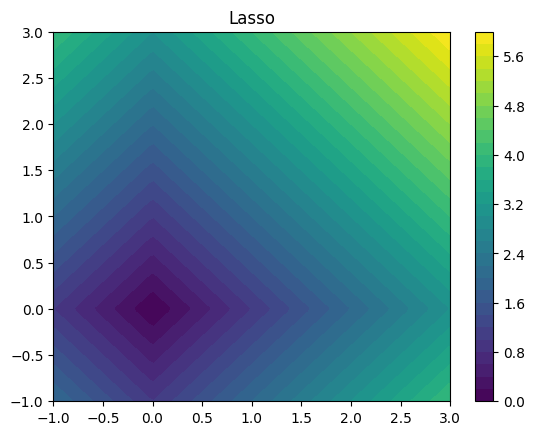

In [9]:
# Plt the Ridge regression regularisation term as well as Lasso regularisation term
# Ridge
ridge = np.linalg.norm(bs, axis=-1)
plt.contourf(b1, b2,ridge, levels=30)
#plt.xlabel(f'$\beta_0$')
plt.colorbar()
plt.title('Ridge')
plt.show()

# Lasso
lasso = np.sum(np.abs(bs), axis=-1)
plt.contourf(b1, b2, lasso, levels=30)
plt.colorbar()
plt.title('Lasso')
plt.show()


Lasso always 45 to 

Ridge slows down as it approaches zero - prevents reaching zero
Lasso constant rate down to 0

### (b)

In [5]:
y.shape

(1, 100)

(100, 100)


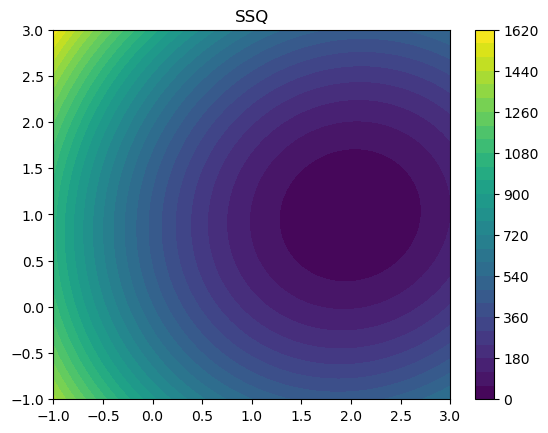

In [6]:
#For the data set linreg.npz plot the sum of squares (SSQ) of a linear regression as a function of β
#over the same range as in i), i.e. over the grid [−1, 3] × [−1, 3].

# use bs grid from above
ssq = np.sum((y[:, None] - bs @ x)**2, axis=2)
print(ssq.shape)
plt.contourf(b1, b2, ssq, levels=30)
plt.colorbar()
plt.title('SSQ')
plt.show()



### (c)

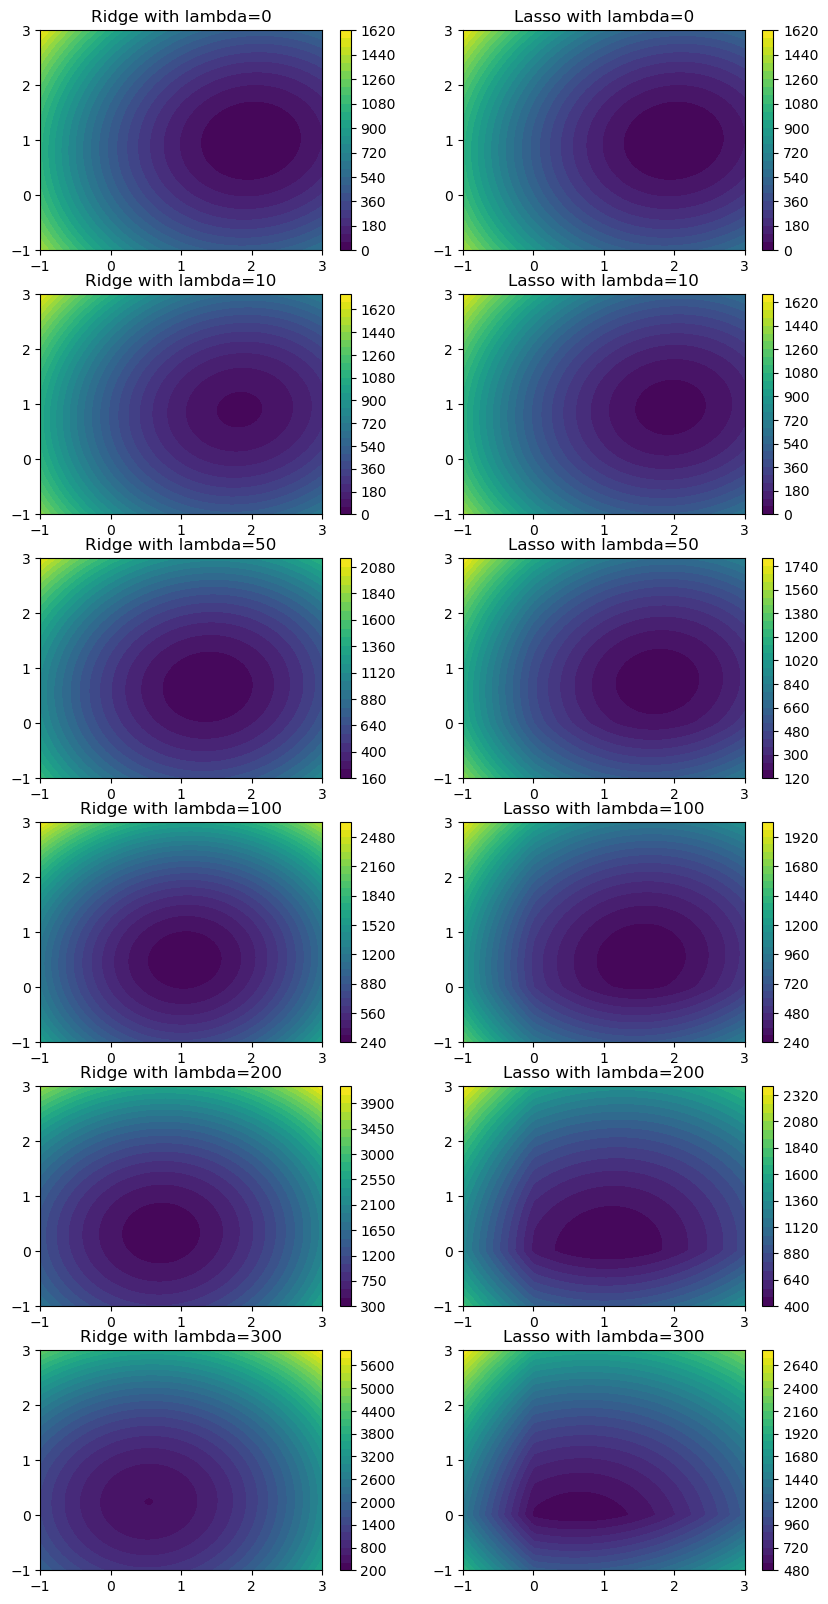

In [7]:
# TODO: for each lambda, plot both ridge regression and lasso loss functions
lambdas = [0, 10, 50, 100, 200, 300]

fig, ax = plt.subplots(6, 2, figsize=(10, 20))
for i in range(len(lambdas)):
    l = lambdas[i]
    ridge = np.linalg.norm(bs, axis=-1)**2
    lasso = np.sum(np.abs(bs), axis=-1)
    ssq = np.sum((y[:, None] - bs @ x)**2, axis=2)
    im = ax[i,0].contourf(b1, b2, ssq + l*ridge, levels=30)
    plt.colorbar(im, ax=ax[i, 0])
    ax[i,0].set_title(f'Ridge with lambda={l}')
    
    im = ax[i,1].contourf(b1, b2, ssq + l*lasso, levels=30)
    plt.colorbar(im, ax=ax[i, 1])
    ax[i,1].set_title(f'Lasso with lambda={l}')

plt.show()

As $\lambda$ increases the centre of the contours shifts towards the origin
For the ridge regression, the contour shape stays the same. - Approaches 0 directly.

Whereas for the Lasso, the countours deform about the axes.

## 4 CT Reconstruction

First, set up the design matrix. (Run this once to save it to the disk)

In [8]:
# create design matrix
# don't change any of this, just run it once to create and save the design matrix
import os

n_parallel_rays = 70 
n_ray_angles = 30
res = (99, 117)
print("Number of pixels in the 2d image:", np.prod(res))
print("Total number of rays:", n_parallel_rays * n_ray_angles)

def rot_mat(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.stack([np.stack([c, s], axis=-1), np.stack([-s, c], axis=-1)], axis=-1)

kernel = lambda x: np.exp(-x**2/sigma**2/2)

if not os.path.exists('data/design_matrix.npy'):
    xs = np.arange(0, res[1]+1) - res[1]/2 # np.linspace(-1, 1, res[1] + 1)
    ys = np.arange(0, res[0]+1) - res[0]/2 # np.linspace(-1, 1, res[0] + 1)

    # rays are defined by origin and direction
    ray_offset_range = [-res[1]/1.5, res[1]/1.5]
    n_rays = n_parallel_rays * n_ray_angles

    ray_angles = np.linspace(0, np.pi, n_ray_angles, endpoint=False) + np.pi/n_ray_angles

    # offsets for ray_angle = 0, i.e. parallel to x-axis
    ray_0_offsets = np.stack([np.zeros(n_parallel_rays), np.linspace(*ray_offset_range, n_parallel_rays)], axis=-1)
    ray_0_directions = np.stack([np.ones(n_parallel_rays), np.zeros(n_parallel_rays)], axis=-1)

    

    ray_rot_mats = rot_mat(ray_angles)

    ray_offsets = np.einsum('oi,aij->aoj', ray_0_offsets, ray_rot_mats).reshape(-1, 2)
    ray_directions = np.einsum('oi,aij->aoj', ray_0_directions, ray_rot_mats).reshape(-1, 2)

    sigma = 1
    xsc = (xs[1:] + xs[:-1]) / 2
    ysc = (ys[1:] + ys[:-1]) / 2
    b = np.stack(np.meshgrid(xsc, ysc), axis=-1).reshape(-1, 2)
    a = ray_offsets
    v = ray_directions
    v = v / np.linalg.norm(v, axis=-1, keepdims=True)
    p = ((b[None] - a[:, None]) * v[:, None]).sum(-1, keepdims=True) * v[:, None] + a[:, None]
    d = np.linalg.norm(b - p, axis=-1)
    d = kernel(d)
    design_matrix = d.T

    np.save('data/design_matrix.npy', design_matrix)
    print(f'created and saved design matrix of shape {design_matrix.shape} at data/design_matrix.npy')

Number of pixels in the 2d image: 11583
Total number of rays: 2100


sino shape: (1, 2100)


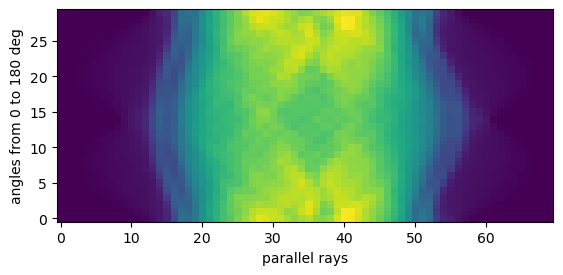

In [9]:
sino = np.load('data/sino.npy')

print(f'sino shape: {sino.shape}')

# visualize sinogram as image
n_parallel_rays = 70
n_angles = 30
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower')
# plt.colorbar()
plt.xlabel('parallel rays')
plt.ylabel('angles from 0 to 180 deg')
plt.show();

### (a)

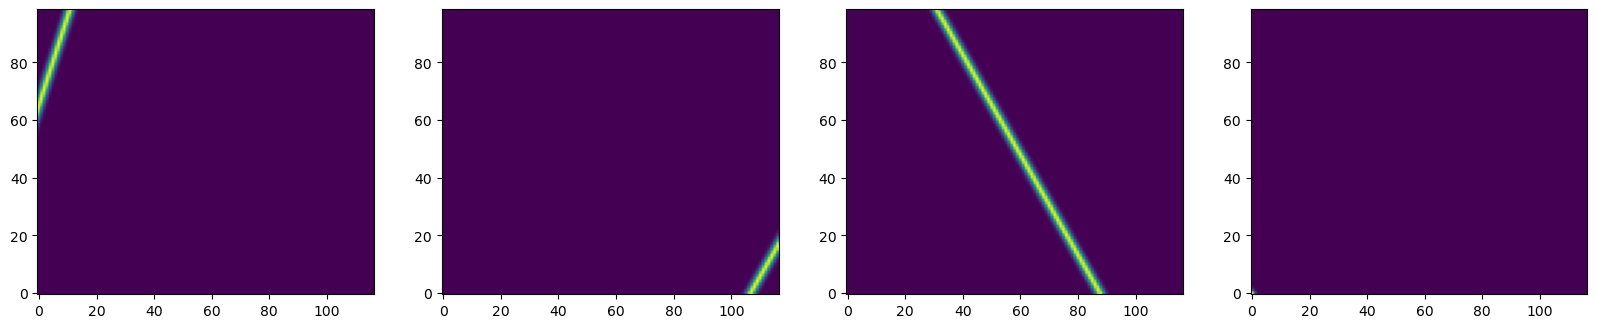

In [10]:
design_matrix = np.load('data/design_matrix.npy')

# TODO: visualize four random columns as images, using an image shape of (99, 117)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    ax[i].imshow(design_matrix[:, np.random.randint(design_matrix.shape[1])].reshape(99, 117), origin='lower')
plt.show()

The columns show for a given detector and angle, the response it can receive from different pixels. (If it can receive signal from that pixel, and the strength of the signal.)

### (b)

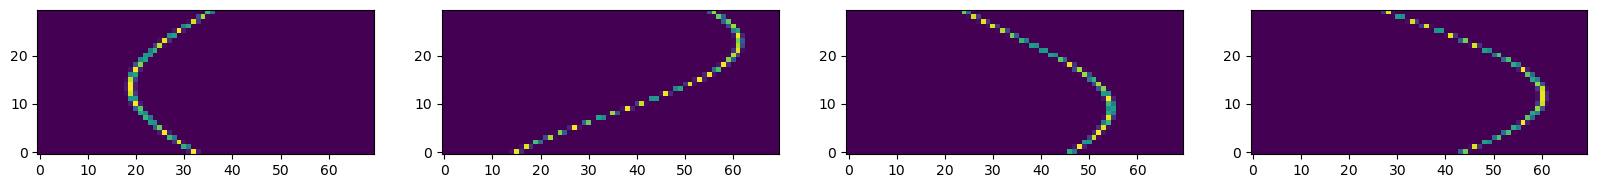

In [11]:
# TODO: visualize four random rows as images, using an images
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for i in range(4):
    ax[i].imshow(design_matrix[np.random.randint(design_matrix.shape[0])].reshape(30, 70), origin='lower')
plt.show()

The rows show  which detectors and angles can receive signals and the strength of that signal from a given pixel.

### (c)

In [12]:
sino.shape, design_matrix.shape

((1, 2100), (11583, 2100))

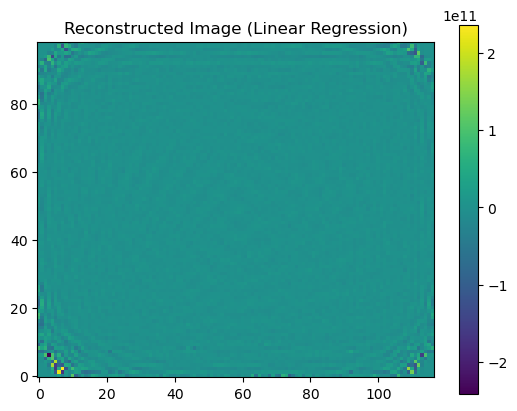

In [13]:
# TODO: solve the reconstruction with linear regression (no regularisation) and visualize the result
# Load the design matrix and sinogram
#design_matrix = np.load('data/design_matrix.npy')
#sino = sino.reshape(n_angles * n_parallel_rays)

# Perform linear regression
model = LinearRegression()
model.fit(design_matrix.T, sino.flatten())
reconstructed_image = model.coef_.reshape(res)

# Visualize the reconstructed image
plt.imshow(reconstructed_image, origin='lower')
plt.title('Reconstructed Image (Linear Regression)')
plt.colorbar()
plt.show()


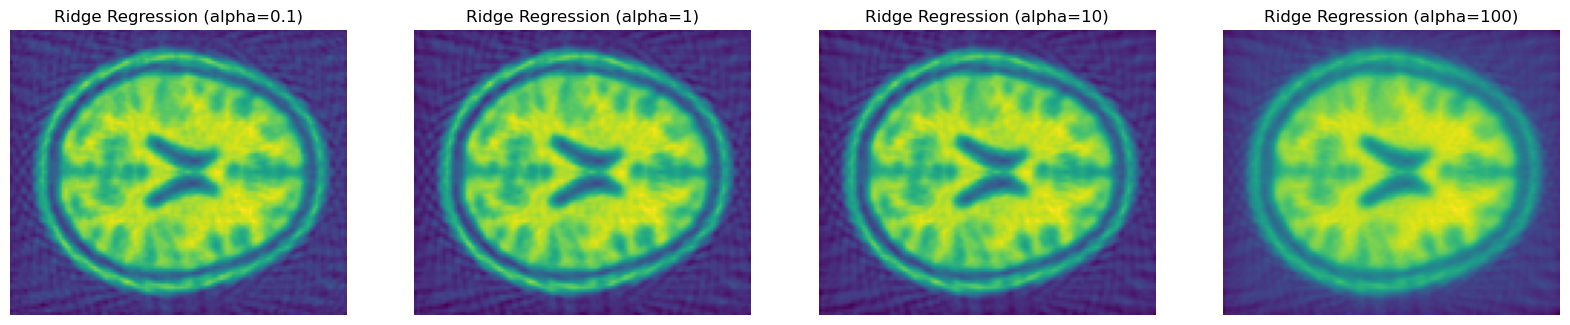

In [14]:
# TODO: solve the reconstruction with ridge regression and visualize the result
# Optional: try out different regularization strengths and oberve the influence
from sklearn.linear_model import Ridge

# Perform ridge regression with different regularization strengths
alphas = [0.1, 1, 10, 100]
fig, ax = plt.subplots(1, len(alphas), figsize=(20, 5))

for i, alpha in enumerate(alphas):
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(design_matrix.T, sino.flatten())
    reconstructed_image_ridge = ridge_model.coef_.reshape(res)
    
    ax[i].imshow(reconstructed_image_ridge, origin='lower')
    ax[i].set_title(f'Ridge Regression (alpha={alpha})')
    ax[i].axis('off')

plt.show()

The Ridge regression considerably outperforms the Linear Regression, which is unable to reconstruct the image in any useful way.
- Check regularised regression in handout - need constraint on optimisation

## 5 Bonus: X-Ray Free-Electron Lasers

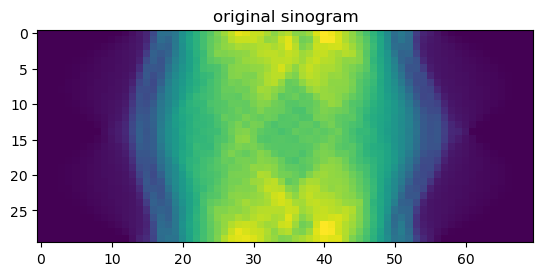

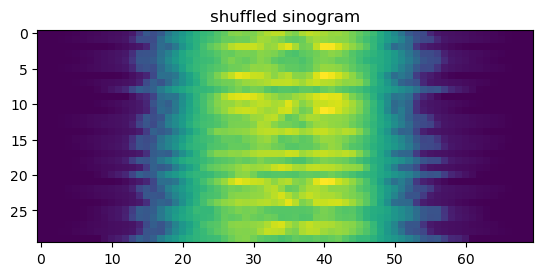

In [15]:
sino = np.load('data/sino.npy').reshape(n_angles, n_parallel_rays)
plt.imshow(sino)
plt.title('original sinogram')
plt.show()

order = np.arange(n_angles)
np.random.shuffle(order)
sino_shuffled = sino[order]
plt.imshow(sino_shuffled)
plt.title('shuffled sinogram')
plt.show()

Runtime: 3.3538594245910645


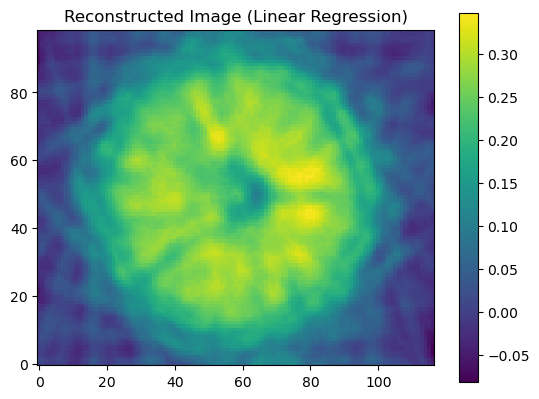

In [16]:
#Try to reconstruct the image from the data of task 4, after shuffling the sinogram along the angle axis
#Perturbatively perform Ridge regression

import time

t1=time.time()

alphas = [100, 50, 20, 10, 1, 0.1]
sino_pert = sino_shuffled
#print(sino_pert.shape)
for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(design_matrix.T, sino_pert.flatten())
    reconstructed_image = model.coef_.reshape(res)
    sino_pert = (model.coef_[:,np.newaxis].T @ design_matrix).reshape(30,70)
    #print(sino_pert.shape)

t2=time.time()
print(f"Runtime: {t2-t1}")

# Visualize the reconstructed image
plt.imshow(reconstructed_image, origin='lower')
plt.title('Reconstructed Image (Linear Regression)')
plt.colorbar()
plt.show()

We can try all the full permutation and choose the one with lowest loss function value, but it will be very expensive. Notice that the shuffle performed above still makes every data that have same angle in the same row, we can just try every permutations with of angles, this will give a O(a!) time. This is still very expensive for large a. To make this cheaper, we can divided both X and Y into a = n_angles submatrixs, each with shape (p, r) and (1, r), and try to run regression on these smaller datasets for every pair of $X_i$ and $Y_j$, and for every $X_i$, use the results that returns minimum loss. This gives O($a^2$) time, which is faster, but the performance could be lower than trying out every permutations.

In [17]:
x_sub = []
y_sub = []
for i in range(n_angles):
    x_sub.append(design_matrix[:, i*n_parallel_rays: (i+1)*n_parallel_rays])
    y_sub.append(sino_shuffled[i])

Runtime: 2.5525357723236084


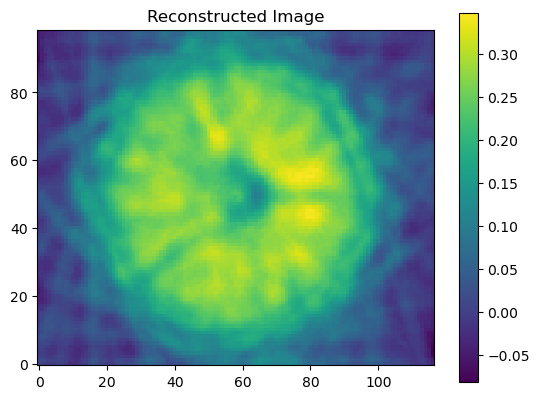

In [18]:
# submatrix pair
def loss_ridge(x, y, beta, alpha):
    m = y - beta.T @ x

    return np.dot(m.flatten(), m.flatten()) + alpha * np.dot(beta.flatten(), beta.flatten())

t1=time.time()

permuts = []
for i in range(n_angles):
    score = np.inf
    ind = -1
    for j in range(n_angles):
        if j in set(permuts):
            continue

        model = Ridge(alpha=1)
        model.fit(x_sub[i].T, y_sub[j].flatten())
        score_tmp = loss_ridge(x_sub[i], y_sub[j].reshape(1, n_parallel_rays), model.coef_.reshape(res[0]*res[1], 1), 1)
        if score > score_tmp:
            ind = j
            score = score_tmp
    permuts.append(ind)

y_guess = np.array([x for _, x in sorted(zip(permuts, y_sub))]).flatten()

ridge_model = Ridge(alpha=1)
ridge_model.fit(design_matrix.T, y_guess)
reconstructed_image_ridge = ridge_model.coef_.reshape(res)

t2=time.time()
print(f"Runtime: {t2-t1}")

plt.imshow(reconstructed_image, origin='lower')
plt.title('Reconstructed Image')
plt.colorbar()
plt.show()

Can try greedy approach to reorder sinogram

Keep one that gives lowest sum of squares - yields "better score"

This gives rough best ordering, then permute through orientations (here 30 possible) to get original image at best orientation


Could also embed 30 angles into into 2d with umap to create continuous path